# The Plug-and-Chug Notebook for Ethogram-Making:
## This notebook includes:
   ### 1. Re-encoding videos
   ### 2. Creating inferences (label) on your videos using an existing SLEAP model and exporting the coordinates in an .h5 file
   - you can also do the inferences and exporting the coordinates in the SLEAP application. When running the inferences in the SLEAP app, depending on if and what error message you get, you may need to **re-encode your videos** 
   ### 3. Getting Behavioral Syllables




This notebook does not include:
   - how to create and train a SLEAP model
   - how to create and train a Keypoint Moseq model



First, let's get your packages imported so we can use them in our code. A list of packages that you need to install in your environment is in the README.txt file. Remember **importing =/= installing** (I've made this silly mistake multiple times when sleep deprived)

environment location: C:\Users\Steve\anaconda3\envs\keypoint_moseq

In [1]:
import os
#import keypoint_moseq as kpms
import subprocess #this is how you are going to use FFmpeg. also, installation of the FFmpeg "package" is different from other packages


In [2]:
import keypoint-

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Steve\anaconda3\envs\keypoint_moseq\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
  File "C:\Users\Steve\AppData\Local\Temp\ipykernel_23968\3593848235.py", line 1, in <module>
    import numpy as np
ModuleNotFoundError: No module named 'numpy'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Steve\anaconda3\envs\keypoint_moseq\lib\site-packages\pygments\styles\__init__.py", line 45, in get_style_by_name
ModuleNotFoundError: No module named 'pygments.styles.default'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Steve\anaconda3\envs\keypoint_moseq\lib\site-packages\IPython\core\interactiveshell.py", line 2144, in showtraceback
  File "c:\Users\Steve\anaconda3\envs\keypoint_moseq\lib\site-packages\IPython\core\ultratb.py", line 1435, in structured_traceback
  Fi

Also get your file paths set up:

In [5]:
beforereencodingvidfolder_dir = 'C:/Users/Steve/Desktop/Karin/test/before/' #put None if you don't want to reencode
video_dir = 'C:/Users/Steve/Desktop/Karin/test/after/' #change directory of output folder here for the videos and h5 files
model_path = 'C:/Users/Steve/Desktop/Karin/tutorials/240702_115047.multi_instance.n=1262/' #where is your SLEAP model?

# 1. Re-encoding videos
A common problem with SLEAP are videos that are [not reliably seekable](https://sleap.ai/develop/help.html). In my experience, sometimes when I want to run inferences, SLEAP will print out an error in the error log saying something about an issue with the last frame of the video. I've had this issue with a few videos on the Grid (but somehow not Katie's) and it has to do with how the video data is stored (I'm pretty sure). One of the things you can to trouble shoot is re-encoding. Something to note is that re-encoding ***changes your file***, and personally, I'm a believer of the "less is more" approach when it comes to any post-collection modifying of data. 

Anyways, here is a function that will reencode your videos in the '''beforereencodingvidfolder_dir''' folder directory

In [4]:
def reencode_videos(beforereencodingvidfolder_dir, video_dir):
    if beforereencodingvidfolder_dir is None or not os.path.exists(beforereencodingvidfolder_dir):
        print('no reencoding today!')
        return
    else:
        # Ensure output directory exists
        os.makedirs(video_dir, exist_ok=True)

        # FFmpeg command template
        ffmpeg_command = 'ffmpeg -y -i "{input_file}" -c:v libx264 -pix_fmt yuv420p -preset superfast -crf 23 "{output_file}"'

        # Iterate through each file in beforevidfolder_dir
        for filename in os.listdir(beforereencodingvidfolder_dir):
            if filename.endswith('.mp4'):
                input_file = os.path.join(beforereencodingvidfolder_dir, filename)
                output_file = os.path.join(video_dir, filename)
                
                # Construct and execute FFmpeg command
                command = ffmpeg_command.format(input_file=input_file, output_file=output_file)
                
                try:
                    subprocess.run(command, shell=True, check=True)
                    print(f'Reencoded {filename} and saved as {os.path.basename(output_file)}')
                except subprocess.CalledProcessError as e:
                    print(f'Error reencoding {filename}: {e}')

Here is the code to execute said function

In [5]:
reencode_videos(beforereencodingvidfolder_dir, video_dir)


Reencoded NBL3_post_home_20241001_10.avi.mp4 and saved as NBL3_post_home_20241001_10.avi.mp4


# 2. Creating inferences (A.K.A. labeling) on your videos using an existing SLEAP model and exporting the 2D coordinates in an .h5 file
At this point you are going to have to change the kernel to "sleap" (whomp whomp) because for some reason I can't do it for you. Believe me, I tried for like an hour. Basically, I couldn't install Keypoint Moseq in the same environment as SLEAP which is why you need to change kernels.

*Anyways*... I wrote a few lines that will run in the terminal to basically generate labels in an .slp file (SLEAP file) and an .h5 file based off of the model that you set 'model_path' to earlier. The .h5 file is what you will use for classifying the behaviors in your videos. 

You change kernels by 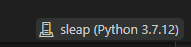

##### TLDR: If you started running this notebook in a different kernel, now is the time to ***change your kernel to sleap***. Also, since changing kernels will reset your variables, ***re-run the cell where you imported your packages and the cell where you specified your file/folder paths***



So this first cell is for SLEAP labeling your videos and printing a .slp file (yes it will take awhile)

In [ ]:
max_tracks = 1 #number of animals you are tracking
tracker = 'simplemaxtracks'
for filename in os.listdir(video_dir):
    if filename.endswith('.mp4'):
        input_file = os.path.join(video_dir, filename)
        output_filename = os.path.splitext(filename)[0] + '.slp'
        output_file_path = os.path.join(video_dir, output_filename)
        sleap_track_command = f"sleap-track -m {model_path} " \
                              f"--tracking.tracker {tracker} " \
                              f"--tracking.max_tracking {1} " \
                              f"--tracking.max_tracks {max_tracks} " \
                              f"-o {output_file_path} " \
                              f"{input_file}"
        try:
                # Execute the command
                subprocess.run(sleap_track_command, shell=True, check=True)
        except subprocess.CalledProcessError as e:
            print(f'Error processing {filename}: {e}')


: 

This next cell will convert the .slp files to .h5 files

In [10]:
for filename in os.listdir(video_dir):
    if filename.endswith('.slp'):
        input_slpfile = os.path.join(video_dir, filename)
        output_h5filename = os.path.splitext(filename)[0] + '.h5'
        output_h5file_path = os.path.join(video_dir, output_h5filename)
        sleap_convert_command = f"sleap-convert --format analysis -o {output_h5file_path} {input_slpfile}"
        try:
            subprocess.run(sleap_convert_command)
        except subprocess.CalledProcessError as e:
            print(f'Error processing {filename}: {e}')